In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nanamulyanamaghfur","key":"11da37dbb74c981039e2be0329480536"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d larsen0966/student-performance-data-set

  0% 0.00/12.1k [00:00<?, ?B/s]
100% 12.1k/12.1k [00:00<00:00, 18.1MB/s]


In [5]:
!unzip student-performance-data-set.zip -d student_performance

Archive:  student-performance-data-set.zip
  inflating: student_performance/student-por.csv  


In [6]:
import pandas as pd

data = pd.read_csv("/content/student_performance/student-por.csv")

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [28]:
x = data[["studytime", "freetime", "G1", "G2"]]
y = data["G3"] 

In [29]:
import numpy as np

"""def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_columns = ["studytime", "freetime"]

for col in scaled_columns:
  x[col] = NormalizeData(x[col])"""

# Custom Normalization based on data characteristic

x['studytime'] = x['studytime'] / 4
x['freetime'] = x['freetime'] / 5

# We rescale the grade system from base 20 into base 100
x['G1'] = x['G1'] * 5 / 100
x['G2'] = x['G2'] * 5 / 100 

x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,studytime,freetime,G1,G2
0,0.50,0.6,0.00,0.55
1,0.50,0.6,0.45,0.55
2,0.50,0.6,0.60,0.65
3,0.75,0.4,0.70,0.70
4,0.50,0.6,0.55,0.65


In [30]:
y = y * 5 / 100

y.head()

0    0.55
1    0.55
2    0.60
3    0.70
4    0.65
Name: G3, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [32]:
x_train.shape

(486, 4)

In [33]:
y_train.shape

(486,)

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(4, input_shape=[4], activation="relu")) 
model.add(Dense(4, activation="relu")) 
model.add(Dense(2, activation="relu")) 
model.add(Dense(1))

In [75]:
model.compile(optimizer="adam", loss=tf.keras.losses.LogCosh())

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 3         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model.fit(x= x_train, y= y_train, batch_size=32, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
16/16 [==============================] - 1s 12ms/step - loss: 0.1754 - val_loss: 0.1600
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1627 - val_loss: 0.1439
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1406 - val_loss: 0.1194
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1145 - val_loss: 0.0941
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0885 - val_loss: 0.0697
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0634 - val_loss: 0.0467
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.0281
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.0157
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.0100
Epoch 10/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 11

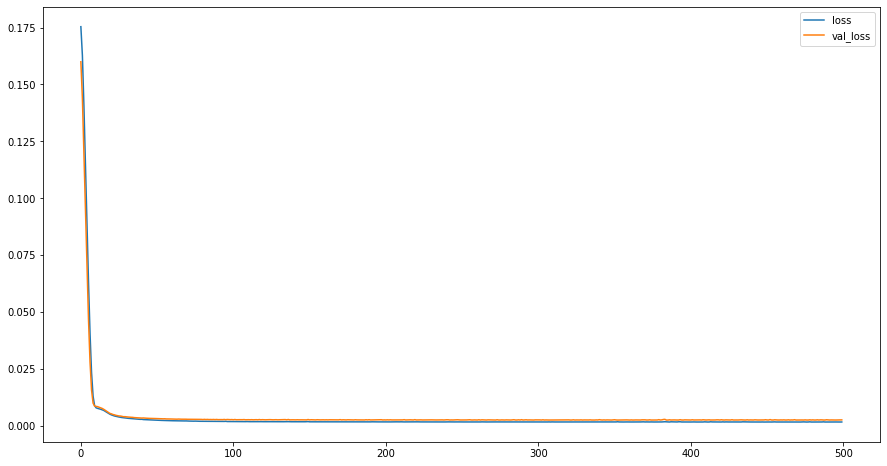

In [78]:
pd.DataFrame(history.history).plot(figsize=(15,8))

In [79]:
predictions = model.predict(x_test)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print("The absolute mean error :",mean_absolute_error(y_test, predictions))
print("The squared mean error :",mean_squared_error(y_test, predictions))
print("The Variance Score :", explained_variance_score(y_test, predictions))

The absolute mean error : 0.043307731268596064
The squared mean error : 0.005415456726847286
The Variance Score : 0.7832525932654515


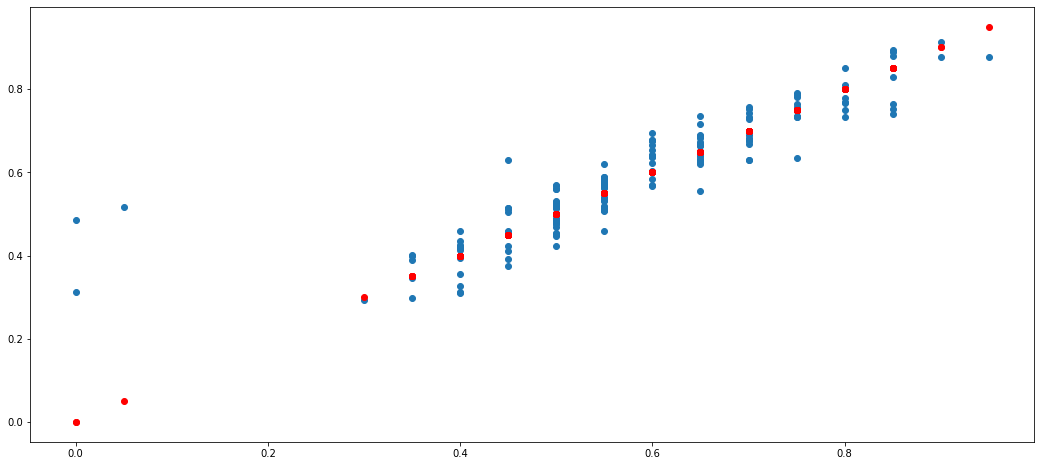

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.scatter(y_test, predictions)
plt.scatter(y_test,y_test,color="red")

In [82]:
from sklearn.metrics import r2_score

sq = r2_score(y_test, predictions)
print('coefficient of determination:', sq)

coefficient of determination: 0.777714363306083


In [83]:
model.save("GF_V2_model.h5")

In [84]:
x_test.head()

,studytime,freetime,G1,G2
175,0.50,0.8,0.35,0.30
452,0.50,0.8,0.45,0.50
463,0.75,0.8,0.70,0.55
418,0.25,0.2,0.65,0.70
566,0.25,0.6,0.45,0.35


In [85]:
y_test.head()

175    0.40
452    0.55
463    0.60
418    0.70
566    0.45
Name: G3, dtype: float64

In [86]:
predictions = model.predict(x_test.head())
print(np.round(predictions, 2))

[[0.31]
 [0.51]
 [0.6 ]
 [0.7 ]
 [0.37]]
